In [0]:
# MNIST DNN using Tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

# Note that keras and tf.keras are different
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

print('Tensorflow ',tf.__version__, '/ Keras ', tf.keras.__version__)

Tensorflow  1.14.0 / Keras  2.2.4-tf


In [0]:
# Load MNIST dataset
digits = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits.load_data()

print('Shape = ', train_images.shape)  #MNIST image size = 28*28
print('Train set length = ',len(train_images))
print('Test set length = ',len(test_images))

Shape =  (60000, 28, 28)
Train set length =  60000
Test set length =  10000


In [0]:
# Preprocessing
# 0~255 scale to 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0

# modify dimension for CNN
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [0]:
# Design model (CNN)
# TODO: reshape dataset
'''
# CNN
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation=tf.nn.softmax)
])
''';


#'''
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()
#''';

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)             

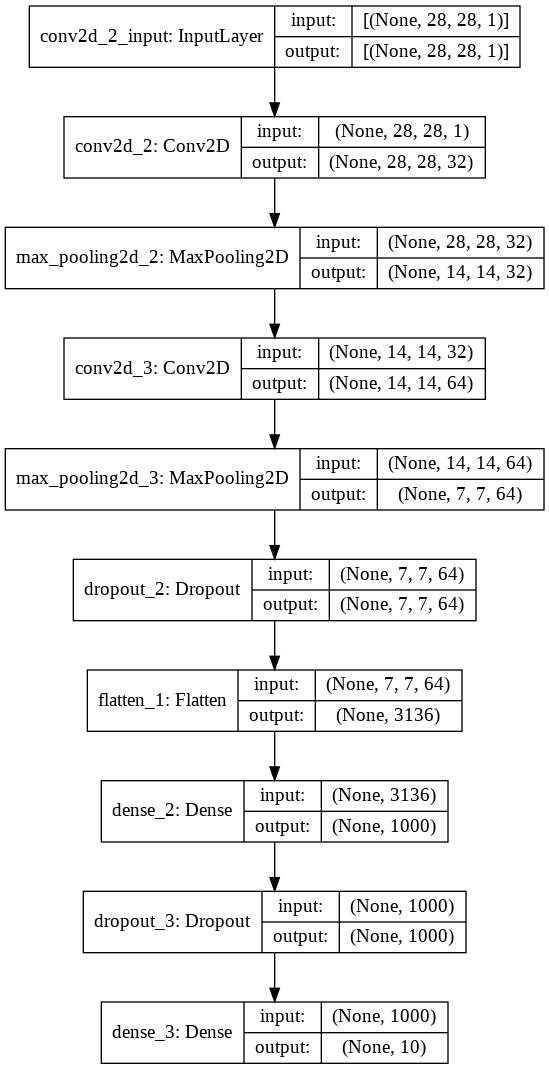

In [0]:
# Compile model
#'''
model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#'''

'''
sgd = tf.keras.optimizers.SGD(lr=0.1, decay=0.00022, momentum=0.5)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
''';


# Visualize model
tf.keras.utils.plot_model(model, show_shapes=True)

In [0]:
# Train model
train_history = model.fit(train_images, train_labels,
                          validation_data=(test_images, test_labels),
                          epochs=3,
                          #verbose=0,
                          batch_size=256
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2404 - acc: 0.9248 - val_loss: 0.0516 - val_acc: 0.9825
Epoch 2/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0655 - acc: 0.9793 - val_loss: 0.0341 - val_acc: 0.9886
Epoch 3/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0464 - acc: 0.9850 - val_loss: 0.0326 - val_acc: 0.9887


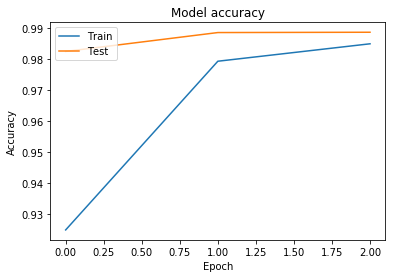

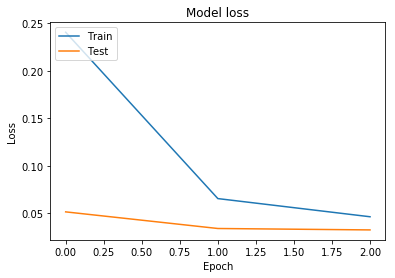

In [0]:
# Plot training history
# Accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()